In [14]:
import numpy as np
%matplotlib inline
%matplotlib widget
import matplotlib.animation as animate
from matplotlib.animation import FuncAnimation, FFMpegWriter
import matplotlib.pyplot as plt
import importlib
import code_chris as code
import ffmpeg

In [19]:
importlib.reload(code)

<module 'code_chris' from 'C:\\Users\\chris\\PHY432\\projects\\final\\work\\code_chris.py'>

In [3]:
const = code.const
convert = code.convert
mass = code.mass
r_j0 = code.r_j0

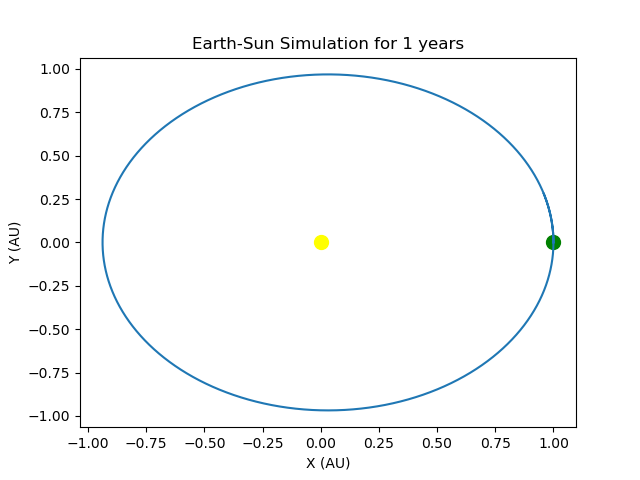

In [4]:
#Earth-Sun Trajectory for 1 year
dt = 1e-5
ri=r_j0["Earth"]
rj=r_j0["Sun"]
mi=mass["Earth"]
mj=mass["Sun"]
t_max = 1

r, v, t = code.integrate(ri=ri, rj=rj, mi=mi, mj=mj, dt=dt, t_max=t_max)
x = r[:, 0]/const["AU"]
y = r[:, 1]/const["AU"]
t_days = t*convert["years to days"]

#Plot of Earth-Sun Trajectory
plt.plot(x, y)
plt.scatter(x[5], y[5], s=100, color='green', marker='o') # Adds earth on the curve
plt.scatter(0, 0, s=100, color='yellow', marker='o') # Adds Sun on the curve
plt.title(f"Earth-Sun Simulation for {t_max} years")
plt.xlabel("X (AU)")
plt.ylabel("Y (AU)")
#plt.savefig("Earth-Sun System")
plt.show()

In [30]:
len(r_t)

3

#Animation of trajectory
fig = plt.figure()

#earth = ax.scatter(x[0], y[0], s=100, color='green', marker='o', label="Earth") # Adds earth on the curve
#Sun = ax.scatter(0, 0, s=200, color='yellow', marker='o', label="Sun") # Adds Sun on the curve
plt.xlim(-1.2, 1.2), plt.ylim(-1.2, 1.2), plt.xlabel('X [AU]'), plt.ylabel('Y [AU]')
#ax.legend()

traj, = plt.plot([], [], 'b-')

#def update_data(frame):
    # for each frame, update the data stored on each artist.
    #traj.set_data(x[:frame], y[:frame])
    #return animated_plot


#anim = animate.FuncAnimation(fig=fig, func=update_data, frames=t, interval=30, blit=True)
metadata = dict(title='Earth_Orbit', artist='chris')
writer = animate.PillowWriter(fps=60, metadata=metadata)

xlist = []
ylist = []

with writer.saving(fig, "orbit.gif", 100):
    for i in x:
        xlist.append(i)
        ylist.append(y[x==i])

        traj.set_data(xlist, ylist)

        writer.grab_frame()
#anim.save("Earth_orbit.mp4", writer=writer)
#plt.show()

In [ ]:
plt.close()

In [ ]:
#3-body System

In [11]:
dt = 1e-5
ri3=np.array([r_j0["Earth"], r_j0["Mercury"]])
rj3=np.array([r_j0["Sun"], r_j0["Earth"], r_j0["Mercury"]])
mi3=np.array([mass["Earth"], mass["Mercury"]])
mj3=np.array([mass["Sun"], mass["Earth"], mass["Mercury"]])
t_max = 1

In [20]:
code.F_net(ri=ri3, rj=rj3, mi=mi3, mj=mj3)

1.9479928051204837e+36